Handwritten digit recognition using MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax
import tensorflow as tf 
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
# here I am Reshaping the input Data 
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
# Normalizing Pixels

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [25]:
#shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [26]:
# Creating a Sequential Model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[-0.7844978 , -0.15523395,  0.5256138 ,  0.53956425,  0.2742061 ,
         0.35980576, -0.30116054, -0.85607576,  0.47379595, -0.4349454 ]],
      dtype=float32)

In [29]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.04192063, 0.07865269, 0.15538248, 0.15756533, 0.12084177,
        0.13164142, 0.06797332, 0.03902491, 0.14753595, 0.05946159]],
      dtype=float32)

In [30]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [31]:
# Train the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2969 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1441 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9763


In [18]:
# Evaluate the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0749 - accuracy: 0.9769 - 536ms/epoch - 2ms/step


[0.07485288381576538, 0.9768999814987183]

In [19]:
# here i am Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.6375485e-08, 1.8523241e-10, 1.1620372e-06, 1.6168840e-04,
        2.9753325e-11, 5.8844577e-08, 5.4742219e-13, 9.9975854e-01,
        5.5733148e-07, 7.8015495e-05],
       [1.3107011e-07, 5.0715101e-04, 9.9945718e-01, 2.6238722e-05,
        5.1491460e-11, 4.0441256e-07, 9.4964162e-07, 4.7134453e-12,
        7.9545289e-06, 6.1691534e-11],
       [7.8193239e-07, 9.9763310e-01, 7.3336487e-05, 3.2832108e-06,
        2.9160877e-04, 2.4584415e-06, 7.3252427e-06, 1.8112819e-03,
        1.7314080e-04, 3.6010765e-06],
       [9.9993396e-01, 9.5177277e-10, 6.8858249e-06, 6.6359620e-09,
        5.2149021e-06, 2.4385574e-06, 1.5200508e-06, 3.3654817e-06,
        1.9929772e-07, 4.6299017e-05],
       [1.0139336e-05, 1.4938507e-09, 3.1313015e-05, 4.8508304e-07,
        9.8832732e-01, 3.2702678e-06, 9.7867078e-06, 6.1995328e-05,
        2.5914629e-05, 1.1529812e-02]], dtype=float32)>

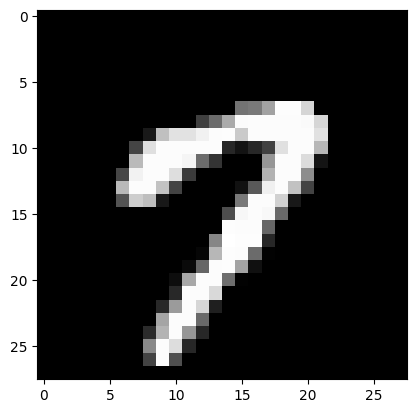

In [23]:
# Displaying a Grayscale Image
img = x_train[15]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [24]:
# Predicting the Result( enter different indexes to predict different digits)
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 22ms/step
predicted : 7
